In [ ]:
"""
 _____  _   _ ______  _____  _____   _____  _   _   ___    ___   _   _  _   _ 
/  ___|| | | || ___ \|  ___||  ___| |_   _|| | | | / _ \  / _ \ | \ | || | | |
\ `--. | |_| || |_/ /| |__  | |__     | |  | |_| |/ /_\ \/ /_\ \|  \| || | | |
 `--. \|  _  ||    / |  __| |  __|    | |  |  _  ||  _  ||  _  || . ` || | | |
/\__/ /| | | || |\ \ | |___ | |___    | |  | | | || | | || | | || |\  || |_| |
\____/ \_| |_/\_| \_|\____/ \____/    \_/  \_| |_/\_| |_/\_| |_/\_| \_/ \___/ 

"""

# Add required headers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model # sklearn (ScikitLearn) 

In [5]:
 df = pd.read_csv("homeprices.csv")
 df   

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


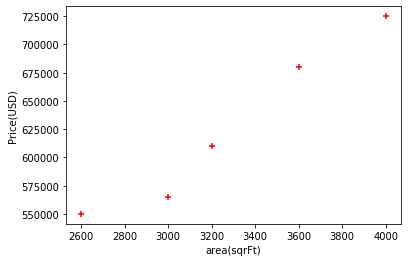

In [7]:
 # Draw a scatter plot to understand data point

%matplotlib inline
plt.xlabel('area(sqrFt)')
plt.ylabel('Price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [15]:
# Based on the graph i can confirm its suitable for linear redression based on the points 
# Creating a linear regression obj
reg = linear_model.LinearRegression()
 
# Fitting the model for training : This calculates Co-e fficient and Intercept 
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#checking value of coeff : Value of M (Slope)
reg.coef_

array([135.78767123])

In [19]:
#checking value of Intercept : value of b
reg.intercept_

180616.43835616432

In [13]:
# It works w/o error now we can go ahead and predict the price
# Price = M * A + B
reg.predict([[3300]])

array([628715.75342466])

In [20]:
# simply solving with math : y = m*x+b 
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [22]:
# The value that we got is similar
# predicting the nxt set of values ( area's)
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [26]:
# predicting the values 
predictedValues = reg.predict(d)

In [28]:
# creating a new column for prices and adding the values
d['prices'] = predictedValues
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [29]:
# exporting to a new csv based on the predicted dataset
d.to_csv('predicted.csv',index=False)

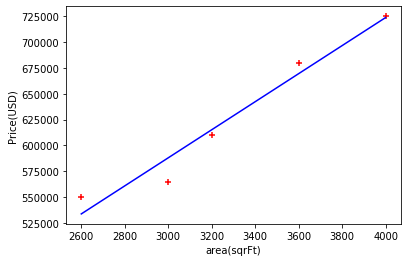

In [32]:
# plot scatter graph based on the new file

%matplotlib inline
plt.xlabel('area(sqrFt)')
plt.ylabel('Price(USD)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

# The visual rep of the Linear regression we made 👏🏻